# ModernBERT text embeddings
Notebook implementing ModernBERT to extract text embeddings of the metadata

https://huggingface.co/answerdotai/ModernBERT-large

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fungiclef.config import get_device

device = get_device()
device

'cuda'

In [3]:
import os
from pathlib import Path

# get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Sun May 11 21:55:14 EDT 2025


In [4]:
import pandas as pd


data_path = f"{root}/p-dsgt_clef2025-0/shared/fungiclef/data"
train_path = f"{data_path}/dataset/processed/train_serialized.parquet"
val_path = f"{data_path}/dataset/processed/val_serialized.parquet"
test_path = f"{data_path}/dataset/processed/test_serialized.parquet"
train_df = pd.read_parquet(train_path)
val_df = pd.read_parquet(val_path)
test_df = pd.read_parquet(test_path)
train_df.head()

,eventDate,year,month,day,habitat,countryCode,scientificName,kingdom,phylum,class,...,region,district,filename,category_id,metaSubstrate,poisonous,elevation,landcover,biogeographicalRegion,data
0,2021-01-24,2021,1.0,24.0,Mixed woodland (with coniferous and deciduous ...,DK,Xylohypha ferruginosa (Corda) S.Hughes,Fungi,Ascomycota,Eurotiomycetes,...,Sjælland,Næstved,0-3052832307.JPG,2421,wood,0,0.0,16.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,0-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,1-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,2-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Hovedstaden,Gribskov,3-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


In [5]:
train_df.columns, len(train_df.columns.to_list())

(Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
        'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family',
        'genus', 'specificEpithet', 'hasCoordinate', 'species',
        'iucnRedListCategory', 'substrate', 'latitude', 'longitude',
        'coorUncert', 'observationID', 'region', 'district', 'filename',
        'category_id', 'metaSubstrate', 'poisonous', 'elevation', 'landcover',
        'biogeographicalRegion', 'data'],
       dtype='object'),
 32)

In [6]:
val_df.columns, len(val_df.columns.to_list())

(Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
        'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family',
        'genus', 'specificEpithet', 'hasCoordinate', 'species',
        'iucnRedListCategory', 'substrate', 'latitude', 'longitude',
        'coorUncert', 'observationID', 'region', 'district', 'filename',
        'category_id', 'metaSubstrate', 'poisonous', 'elevation', 'landcover',
        'biogeographicalRegion', 'data'],
       dtype='object'),
 32)

In [7]:
test_df.columns, len(test_df.columns.to_list())

(Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
        'hasCoordinate', 'substrate', 'latitude', 'longitude', 'coorUncert',
        'observationID', 'region', 'district', 'filename', 'metaSubstrate',
        'elevation', 'landcover', 'biogeographicalRegion', 'data'],
       dtype='object'),
 20)

In [8]:
train_captions_path = f"{data_path}/dataset/processed/train_captions.parquet"
val_captions_path = f"{data_path}/dataset/processed/val_captions.parquet"
test_captions_path = f"{data_path}/dataset/processed/test_captions.parquet"

train_cap_df = pd.read_parquet(train_captions_path)
val_cap_df = pd.read_parquet(val_captions_path)
test_cap_df = pd.read_parquet(test_captions_path)

In [9]:
display(train_cap_df.head())
len(train_cap_df)

,filename,caption
0,0-2237953479.JPG,The image shows a close-up view of a tree tru...
1,3-3414824336.JPG,The image shows a piece of wood with a promin...
2,5-2238512677.JPG,The image shows a fascinating close-up of a f...
3,1-2999542304.JPG,"The image shows several small, dark-colored f..."
4,1-2238522794.JPG,The image shows two mushrooms on a forest flo...


7819

In [10]:
def join_dataframes(df1, df2):
    merged_df = pd.merge(df1, df2, on="filename", how="inner")
    return merged_df


train_join_df = join_dataframes(train_df, train_cap_df)
val_join_df = join_dataframes(val_df, val_cap_df)
test_join_df = join_dataframes(test_df, test_cap_df)
train_join_df.head()

,eventDate,year,month,day,habitat,countryCode,scientificName,kingdom,phylum,class,...,district,filename,category_id,metaSubstrate,poisonous,elevation,landcover,biogeographicalRegion,data,caption
0,2021-01-24,2021,1.0,24.0,Mixed woodland (with coniferous and deciduous ...,DK,Xylohypha ferruginosa (Corda) S.Hughes,Fungi,Ascomycota,Eurotiomycetes,...,Næstved,0-3052832307.JPG,2421,wood,0,0.0,16.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,The image shows two distinct fungi with diffe...
1,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Gribskov,0-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,The image shows a fascinating close-up of fun...
2,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Gribskov,1-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,The image shows a fascinating example of a fu...
3,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Gribskov,2-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,The image shows a close-up view of a fungus g...
4,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,Gribskov,3-3061954303.JPG,386,wood,0,0.0,17.0,continental,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,The image shows a cluster of Podoscypha cilia...


In [15]:
# get columns to keep except filename and data
COLUMNS_TO_KEEP = test_join_df.columns.to_list()
COLUMNS_TO_KEEP.remove("filename")
COLUMNS_TO_KEEP.remove("data")
display(COLUMNS_TO_KEEP)

['eventDate',
 'year',
 'month',
 'day',
 'habitat',
 'countryCode',
 'hasCoordinate',
 'substrate',
 'latitude',
 'longitude',
 'coorUncert',
 'observationID',
 'region',
 'district',
 'metaSubstrate',
 'elevation',
 'landcover',
 'biogeographicalRegion',
 'caption',
 'text']

In [16]:
# concatenate all columns to keep into a single string
def concatenate_columns(row):
    return " ".join([str(row[col]) for col in COLUMNS_TO_KEEP])


train_join_df["text"] = train_join_df.apply(concatenate_columns, axis=1)
val_join_df["text"] = val_join_df.apply(concatenate_columns, axis=1)
test_join_df["text"] = test_join_df.apply(concatenate_columns, axis=1)
train_join_df[["text"]].head()

,text
0,2021-01-24 2021 1.0 24.0 Mixed woodland (with ...
1,2021-02-27 2021 2.0 27.0 garden DK True dead w...
2,2021-02-27 2021 2.0 27.0 garden DK True dead w...
3,2021-02-27 2021 2.0 27.0 garden DK True dead w...
4,2021-02-27 2021 2.0 27.0 garden DK True dead w...


In [30]:
train_df = train_join_df[["filename", "text"]].copy()
val_df = val_join_df[["filename", "text"]].copy()
test_df = test_join_df[["filename", "text"]].copy()
display(train_df.head())
len(train_df), len(val_df), len(test_df)

,filename,text
0,0-3052832307.JPG,2021-01-24 2021 1.0 24.0 Mixed woodland (with ...
1,0-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...
2,1-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...
3,2-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...
4,3-3061954303.JPG,2021-02-27 2021 2.0 27.0 garden DK True dead w...


(7819, 2285, 1911)

In [31]:
text = train_df["text"].iloc[0]
text

"2021-01-24 2021 1.0 24.0 Mixed woodland (with coniferous and deciduous trees) DK True dead wood (including bark) 55.227983 11.680016 25.0 3052832307 Sjælland Næstved wood 0.0 16.0 continental  The image shows two distinct fungi with different visual features:\n\n1. The main fungus:\n- Brown in color\n- Has a textured surface with visible ridges and grooves\n- Features a prominent yellowish-orange cap\n- The cap appears to be slightly raised or domed\n- The body of the fungus is cylindrical and dark brown\n- It has a rough, almost spiky texture along its sides\n\n2. The smaller fungus:\n- White in color\n- Has a smoother surface compared to the main fungus\n- Features a small, round cap\n- The cap is slightly raised but not as prominently as the main fungus\n- The body is also cylindrical but appears thinner and more delicate\n- It has a smoother texture along its sides\n\nThe two fungi are positioned next to each other, allowing for a clear comparison of their different characteristic

### ModernBERT

In [19]:
import torch
from transformers import AutoTokenizer, AutoModel

device = get_device()
model_name = "answerdotai/ModernBERT-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
model.eval()

ModernBertModel(
  (embeddings): ModernBertEmbeddings(
    (tok_embeddings): Embedding(50368, 1024, padding_idx=50283)
    (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (drop): Dropout(p=0.0, inplace=False)
  )
  (layers): ModuleList(
    (0): ModernBertEncoderLayer(
      (attn_norm): Identity()
      (attn): ModernBertAttention(
        (Wqkv): Linear(in_features=1024, out_features=3072, bias=False)
        (rotary_emb): ModernBertRotaryEmbedding()
        (Wo): Linear(in_features=1024, out_features=1024, bias=False)
        (out_drop): Identity()
      )
      (mlp_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (mlp): ModernBertMLP(
        (Wi): Linear(in_features=1024, out_features=5248, bias=False)
        (act): GELUActivation()
        (drop): Dropout(p=0.0, inplace=False)
        (Wo): Linear(in_features=2624, out_features=1024, bias=False)
      )
    )
    (1-27): 27 x ModernBertEncoderLayer(
      (attn_norm): LayerNorm((1024,), eps

In [32]:
from tqdm import tqdm


def get_batch_embeddings(text_list, batch_size=128):
    all_embeddings = []
    for i in tqdm(range(0, len(text_list), batch_size), desc="Processing batches"):
        batch = text_list[i : i + batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}  # move to GPU
        with torch.no_grad():
            outputs = model(**inputs)
            cls_embeds = outputs.last_hidden_state[:, 0, :]  # (batch_size, hidden_size)
        all_embeddings.extend(cls_embeds.cpu().numpy())
    return all_embeddings

In [33]:
# run embedding pipeline
train_df["embeddings"] = get_batch_embeddings(train_df["text"].tolist())

Processing batches: 100%|██████████| 62/62 [05:15<00:00,  5.08s/it]


In [34]:
# validation set
val_df["embeddings"] = get_batch_embeddings(val_df["text"].tolist())

Processing batches: 100%|██████████| 18/18 [01:37<00:00,  5.39s/it]


In [35]:
# test set
test_df["embeddings"] = get_batch_embeddings(test_df["text"].tolist())

Processing batches: 100%|██████████| 15/15 [01:19<00:00,  5.30s/it]


### save to parquet

In [ ]:
from pathlib import Path

output_path = f"{data_path}/embeddings/bert"
Path(output_path).mkdir(parents=True, exist_ok=True)
# save to parquet
train_df.to_parquet(f"{output_path}/train_text_embed.parquet")
val_df.to_parquet(f"{output_path}/val_text_embed.parquet")
test_df.to_parquet(f"{output_path}/test_text_embed.parquet")

### clustering

In [38]:
import pacmap
import numpy as np
from sklearn.preprocessing import StandardScaler


def pacmap_embeddings(df: pd.DataFrame, col_name: str = "embeddings") -> np.ndarray:
    emb_df = np.stack(df[col_name].values)
    scaled_emb = StandardScaler().fit_transform(emb_df)

    # PaCMAP reduction
    reducer = pacmap.PaCMAP(n_components=2, random_state=42)
    embedding = reducer.fit_transform(scaled_emb)  # (n_samples, 2)
    return embedding

In [39]:
train_embed = pacmap_embeddings(train_df)

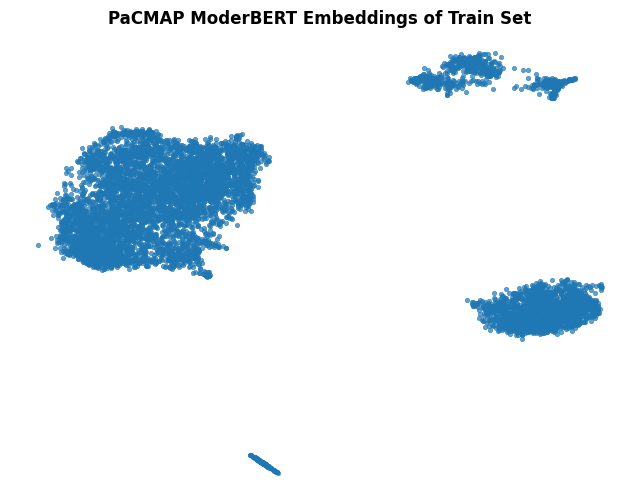

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(train_embed[:, 0], train_embed[:, 1], s=10, alpha=0.7, linewidths=0.5)
plt.title("PaCMAP ModerBERT Embeddings of Train Set", weight="bold")
plt.axis("off")
plt.show()

In [43]:
train_df["embeddings"].iloc[0].shape

(1024,)